In [1]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import the requests library
import requests

# import the API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# starting url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

613

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abu samrah
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | mentok
City not found. Skipping...
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | san quintin
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | gwadar
Processing Record 16 of Set 1 | tuatapere
Processing Record 17 of Set 1 | banda aceh
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | georgetown
Processing Record

Processing Record 37 of Set 4 | aguimes
Processing Record 38 of Set 4 | dingle
Processing Record 39 of Set 4 | pundaguitan
Processing Record 40 of Set 4 | atbasar
Processing Record 41 of Set 4 | safaga
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | shaikhpura
Processing Record 45 of Set 4 | bouafle
Processing Record 46 of Set 4 | cape town
Processing Record 47 of Set 4 | abha
Processing Record 48 of Set 4 | cidreira
Processing Record 49 of Set 4 | kavaratti
Processing Record 50 of Set 4 | upernavik
Processing Record 1 of Set 5 | yellowknife
Processing Record 2 of Set 5 | amzya
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | grafton
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | touros
Processing Record 7 of Set 5 | parnarama
Processing Record 8 of Set 5 | makung
City not found. Skipping...
Processing Record 9 of Set 5 | ararat
Processing Record 10 of Set 5 | havre
Proc

Processing Record 28 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 29 of Set 8 | mackenzie
Processing Record 30 of Set 8 | hasaki
Processing Record 31 of Set 8 | port ellen
City not found. Skipping...
Processing Record 32 of Set 8 | balykshi
Processing Record 33 of Set 8 | nagornyy
Processing Record 34 of Set 8 | culebra
Processing Record 35 of Set 8 | clyde river
Processing Record 36 of Set 8 | kapuskasing
Processing Record 37 of Set 8 | saint-francois
Processing Record 38 of Set 8 | medvezhyegorsk
Processing Record 39 of Set 8 | manacapuru
Processing Record 40 of Set 8 | vaitape
Processing Record 41 of Set 8 | bereda
Processing Record 42 of Set 8 | turayf
Processing Record 43 of Set 8 | kerewan
Processing Record 44 of Set 8 | torbay
Processing Record 45 of Set 8 | gat
Processing Record 46 of Set 8 | malakal
Processing Record 47 of Set 8 | partenit
Processing Record 48 of Set 8 | pecos
Processing Record 49 of Set 8 | half moon bay
Processing Record 50 of Set 8

Processing Record 15 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 16 of Set 12 | klaeng
Processing Record 17 of Set 12 | fortuna foothills
Processing Record 18 of Set 12 | launceston
Processing Record 19 of Set 12 | bharatpur
Processing Record 20 of Set 12 | port hedland
Processing Record 21 of Set 12 | hoghiz
Processing Record 22 of Set 12 | umba
Processing Record 23 of Set 12 | amuntai
Processing Record 24 of Set 12 | sechura
Processing Record 25 of Set 12 | sumbe
Processing Record 26 of Set 12 | lithakia
Processing Record 27 of Set 12 | forbes
Processing Record 28 of Set 12 | shiraz
Processing Record 29 of Set 12 | san isidro
Processing Record 30 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 31 of Set 12 | opotiki
Processing Record 32 of Set 12 | verkhnyaya inta
Processing Record 33 of Set 12 | masyaf
Processing Record 34 of Set 12 | umm kaddadah
Processing Record 35 of Set 12 | prince albert
Processing Record 36 of Set 12 | nabire


In [8]:
len(city_data)

563

In [9]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Abu Samrah,35.3029,37.1841,49.80,52,0,4.65,SY,2021-02-27 23:24:17
1,Airai,-8.9266,125.4092,61.88,100,97,1.77,TL,2021-02-27 23:24:18
2,Punta Arenas,-53.1500,-70.9167,73.40,33,0,8.05,CL,2021-02-27 23:24:18
3,Rikitea,-23.1203,-134.9692,76.60,75,13,15.35,PF,2021-02-27 23:24:18
4,Jamestown,42.0970,-79.2353,35.01,92,40,5.28,US,2021-02-27 23:21:29
5,Mar Del Plata,-38.0023,-57.5575,70.00,88,75,13.80,AR,2021-02-27 23:24:19
6,Busselton,-33.6500,115.3333,62.01,83,42,1.01,AU,2021-02-27 23:24:19
7,Mataura,-46.1927,168.8643,62.01,88,100,1.99,NZ,2021-02-27 23:24:20
8,Fortuna,40.5982,-124.1573,53.01,62,75,16.11,US,2021-02-27 23:24:20
9,Bambous Virieux,-20.3428,57.7575,78.01,83,75,8.59,MU,2021-02-27 23:24:21


In [10]:
# reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Abu Samrah,SY,2021-02-27 23:24:17,35.3029,37.1841,49.80,52,0,4.65
1,Airai,TL,2021-02-27 23:24:18,-8.9266,125.4092,61.88,100,97,1.77
2,Punta Arenas,CL,2021-02-27 23:24:18,-53.1500,-70.9167,73.40,33,0,8.05
3,Rikitea,PF,2021-02-27 23:24:18,-23.1203,-134.9692,76.60,75,13,15.35
4,Jamestown,US,2021-02-27 23:21:29,42.0970,-79.2353,35.01,92,40,5.28
...,...,...,...,...,...,...,...,...,...
558,Itaituba,BR,2021-02-27 23:27:30,-4.2761,-55.9836,86.00,74,75,5.75
559,Upata,VE,2021-02-27 23:27:30,8.0086,-62.3989,75.99,86,60,8.01
560,Puerto Narino,CO,2021-02-27 23:27:30,-3.7703,-70.3831,77.00,100,75,2.30
561,High Level,CA,2021-02-27 23:27:31,58.5169,-117.1360,3.20,60,20,3.06


In [12]:
# create the output (csv)
output_data_file = 'weather_data/cities.csv'
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [13]:
# extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

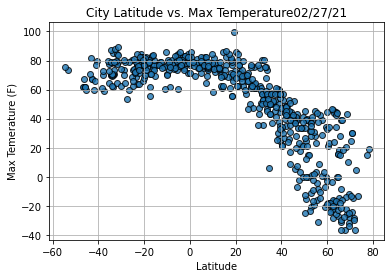

In [14]:
# import the time module
import time

#build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')
# add the other graph properties
plt.title(f'City Latitude vs. Max Temperature' + time.strftime('%x'))
plt.ylabel('Max Temerature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()

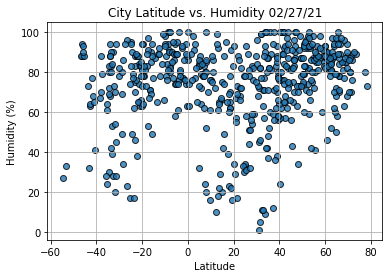

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

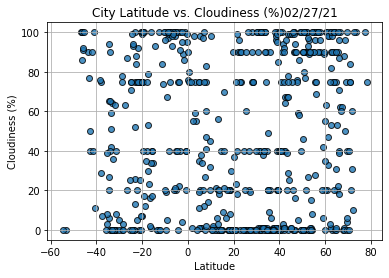

In [16]:
#build the scatter plts for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')
#incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%)' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the fig
plt.savefig('weather_data/Fig3.png')
#show plot
plt.show()

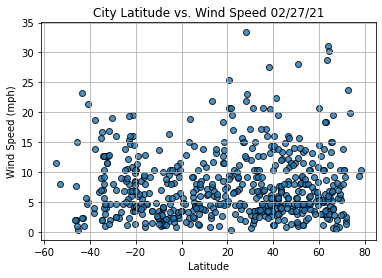

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [53]:
# create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

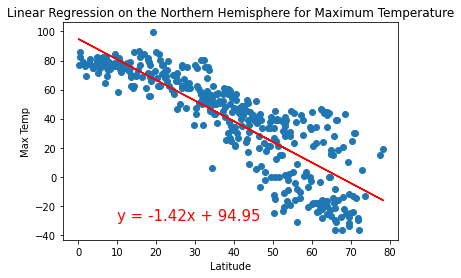

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,-30))

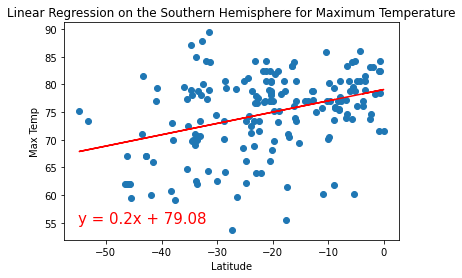

In [62]:
# linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp', (-55,55))

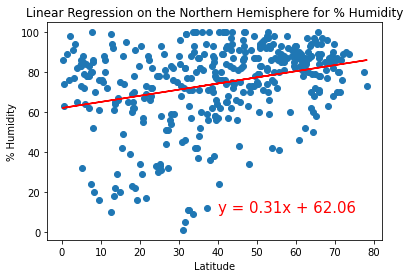

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

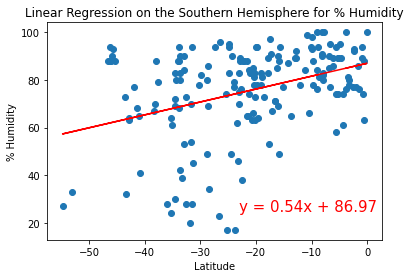

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-23,25))

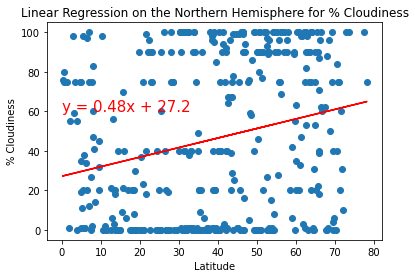

In [73]:
# skill drill 6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(0,60))

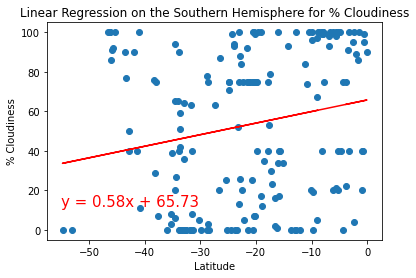

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-55,12))

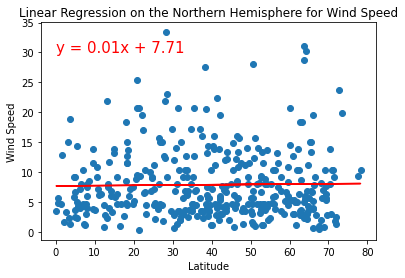

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(0,30))

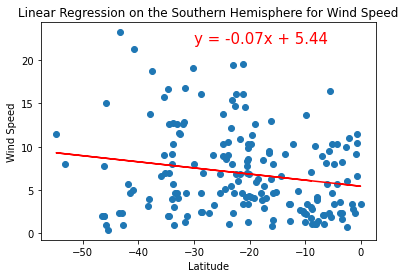

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-30,22))